<a href="https://colab.research.google.com/github/MorawoLekanDavid/ML_projects/blob/main/unsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#### PDF Examples
### Dated 19/11/24

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [13]:
X,y = make_blobs(n_samples = 100, n_features = 2, centers = 5, random_state=42)

In [14]:
k = 5
Kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = Kmeans.fit_predict(X)
y_pred

array([1, 4, 0, 4, 3, 1, 2, 2, 2, 0, 0, 1, 4, 0, 2, 3, 4, 4, 1, 3, 3, 2,
       0, 1, 3, 3, 4, 4, 4, 2, 1, 3, 4, 4, 4, 3, 0, 0, 0, 2, 1, 2, 2, 2,
       3, 0, 0, 1, 3, 4, 4, 2, 2, 1, 2, 3, 4, 4, 0, 0, 2, 0, 3, 1, 3, 1,
       4, 4, 1, 4, 3, 1, 1, 1, 4, 3, 2, 3, 4, 1, 4, 1, 3, 2, 3, 0, 3, 0,
       0, 0, 3, 0, 1, 2, 1, 0, 1, 0, 2, 2], dtype=int32)

In [15]:
Kmeans.cluster_centers_

array([[-2.87559086,  8.66758942],
       [-6.88732163, -6.84846391],
       [ 4.73987759,  2.0192694 ],
       [-8.97484095,  7.55134937],
       [ 1.90144007,  4.22597687]])

In [25]:
Kmeans.inertia_

159.83755106823406

In [28]:
### The best way to measure the result of the n_cluster
from sklearn.metrics import silhouette_score,silhouette_samples
silhouette_avg = silhouette_score(X,Kmeans.labels_)

In [29]:
sample_silhouette_values = silhouette_samples(X,Kmeans.labels_)

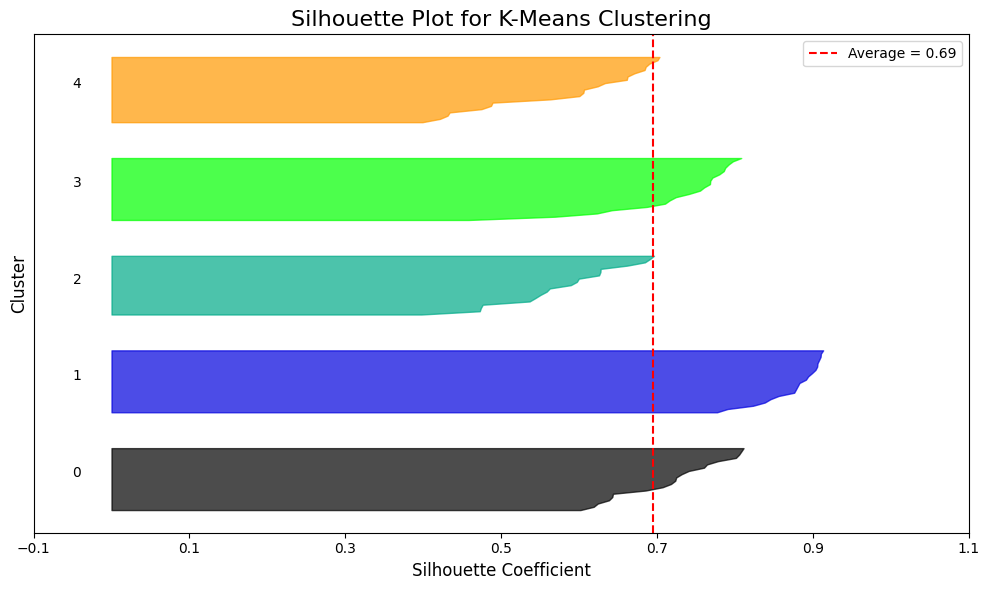

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Step 4: Plot the silhouette diagram
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(k):
    # Aggregate silhouette scores for the cluster
    ith_cluster_silhouette_values = sample_silhouette_values[Kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill the silhouette plot with the cluster's scores
    color = plt.cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    # Label the silhouette plots with their cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Add space between plots

# Step 5: Format the plot
ax.set_title("Silhouette Plot for K-Means Clustering", fontsize=16)
ax.set_xlabel("Silhouette Coefficient", fontsize=12)
ax.set_ylabel("Cluster", fontsize=12)

# Vertical line for average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Average = {silhouette_avg:.2f}")
ax.legend()

ax.set_yticks([])  # Remove y-axis labels
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
plt.tight_layout()
plt.show()


In [31]:
## The above code is for a specified n of clusters denoted as k i.e k =5

For n_clusters = 2, the average silhouette score is 0.59


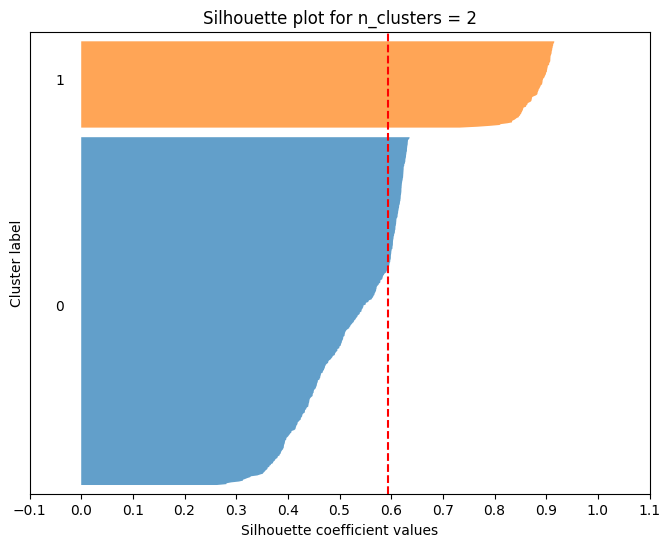

For n_clusters = 3, the average silhouette score is 0.71


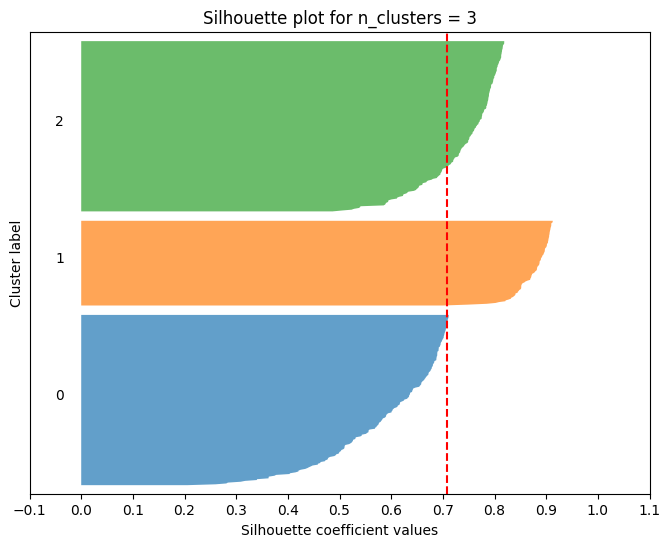

For n_clusters = 4, the average silhouette score is 0.73


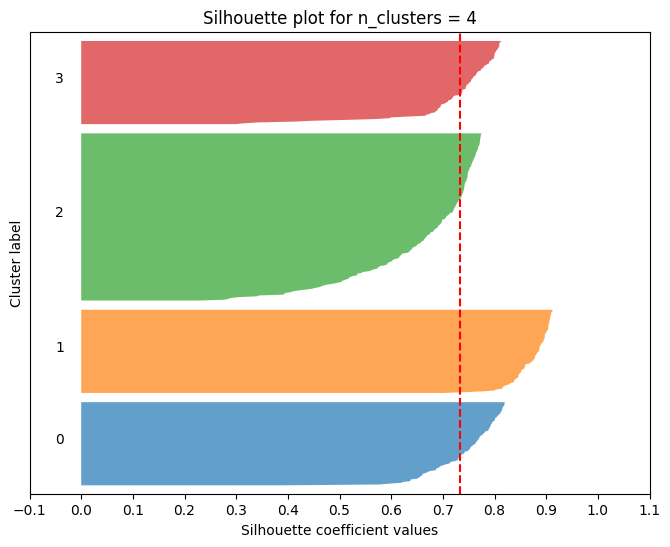

For n_clusters = 5, the average silhouette score is 0.68


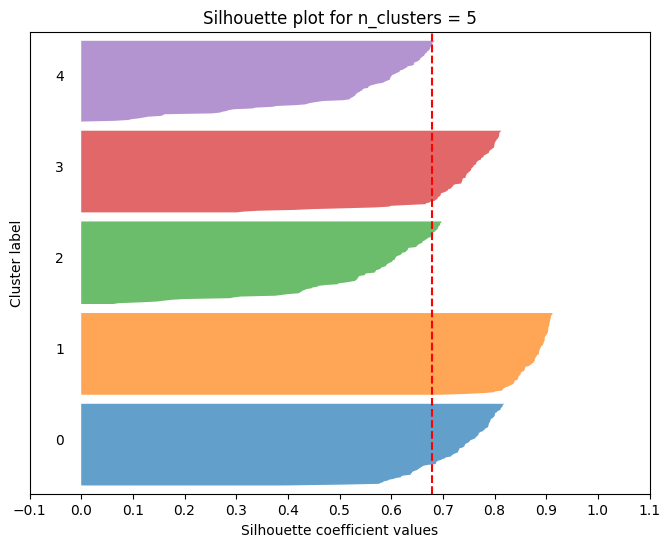

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
X, y = make_blobs(n_samples=500, centers=5,random_state=42)

# Range of clusters to evaluate
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot for the silhouette plot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.2f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Set up the plot
    y_lower = 10
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax1.set_title(f"Silhouette plot for n_clusters = {n_clusters}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Plot silhouette scores for each cluster
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            alpha=0.7
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Adjust y_lower for the next cluster

    # Draw the average silhouette score as a dashed line
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))

    plt.show()


In [33]:
#Note that Kmeans as limitation

**Image Segmentation**